In [3]:
import requests
from io import StringIO
import sqlite3
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [8]:

url = 'https://www.ncei.noaa.gov/access/services/data/v1'

params = {
    'dataset': 'daily-summaries',
    'dataTypes': ','.join([
        'ACMH', 'ACSH', 'ADPT', 'ASLP', 'ASTP', 'AWBT', 'AWND', 'DAEV', 'DAPR', 'DAWM', 'EVAP', 'FMTM', 'FRGT',
        'MDEV', 'MDPR', 'MDWM', 'MNPN', 'MXPN', 'PGTM', 'PRCP', 'PSUN', 'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD',
        'TAVG', 'THIC', 'TMAX', 'TMIN', 'TOBS', 'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WDFM', 'WDMV', 'WESD',
        'WESF', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07',
        'WT08', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT16', 'WT18', 'WT19', 'WT21', 'WT22', 'WV03'
    ]),
    # Max 100 stations
    'stations': ','.join([
        'US1AZPM0294', 'US1AZPM0301', 'US1AZPM0304', 'US1AZPM0306', 'US1AZPM0315', 'US1AZPM0321', 'US1AZPM0328',
        'US1AZPM0336', 'US1AZPM0338', 'US1AZPM0339', 'US1AZPM0340', 'US1AZPM0355', 'US1AZPM0356', 'US1AZPM0362',
        'US1AZPM0363', 'US1AZPM0366', 'US1AZPM0370', 'US1AZPM0371', 'US1AZPM0373', 'US1AZPM0374', 'US1AZPM0379',
        'US1AZPM0384', 'US1AZPM0386', 'US1AZPM0391', 'US1AZPM0399', 'US1AZPM0405', 'US1AZPM0409', 'US1AZPM0411',
        'US1AZPM0412', 'US1AZPM0415', 'US1AZPM0416', 'US1AZPM0422', 'US1AZPM0424', 'US1AZPM0426', 'US1AZPM0427',
        'US1AZPM0433', 'US1AZPM0436', 'US1AZPM0441', 'US1AZPM0442', 'US1AZPM0443', 'US1AZPM0446', 'US1AZPM0449',
        'US1AZPM0450', 'US1AZPM0460', 'US1AZPM0463', 'US1AZPM0470', 'USC00028795', 'USC00028796', 'USC00028799',
        'USC00028800', 'USC00028810', 'USC00028815', 'USC00028817', 'USW00023160', 'USW00053131'        
    ]),
    'startDate': '1893-01-01',
    'endDate': '2024-08-06',
    'boundingBox': '90,-180,-90,180',
    'includeAttributes': 'true',
    'includeStationName': 'true',
    'includeStationLocation': 'true',
    'units': 'metric',
    'format': 'csv'
}

response = requests.get(url, params=params)

# If the response was successful, get csv data as string
if response.status_code == 200:
    csv_data = response.text

else:
    print('Error:', response.status_code)
    print('Response text:', response.text)

In [7]:
# Parse string into csv and read values of first set of stations into dataframe
csv = StringIO(csv_data)
df1 = pd.read_csv(csv, low_memory=False)
df1

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236489,US1AZPM0292,"TUCSON 12.3 NNW, AZ US",32.375752,-111.020463,758.6,2024-07-15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236490,US1AZPM0292,"TUCSON 12.3 NNW, AZ US",32.375752,-111.020463,758.6,2024-07-19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236491,US1AZPM0292,"TUCSON 12.3 NNW, AZ US",32.375752,-111.020463,758.6,2024-07-20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236492,US1AZPM0292,"TUCSON 12.3 NNW, AZ US",32.375752,-111.020463,758.6,2024-07-23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Do the same for the second set of stations after rerunning request
csv = StringIO(csv_data)
df2 = pd.read_csv(csv, low_memory=False)
df2

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,US1AZPM0294,"TUCSON 12.0 WNW, AZ US",32.306854,-111.098115,744.6,2017-01-08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1AZPM0294,"TUCSON 12.0 WNW, AZ US",32.306854,-111.098115,744.6,2017-01-09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1AZPM0294,"TUCSON 12.0 WNW, AZ US",32.306854,-111.098115,744.6,2017-01-10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1AZPM0294,"TUCSON 12.0 WNW, AZ US",32.306854,-111.098115,744.6,2017-01-11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1AZPM0294,"TUCSON 12.0 WNW, AZ US",32.306854,-111.098115,744.6,2017-01-12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195332,USW00053131,"TUCSON 11 W, AZ US",32.239500,-111.169600,833.0,2024-07-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195333,USW00053131,"TUCSON 11 W, AZ US",32.239500,-111.169600,833.0,2024-07-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195334,USW00053131,"TUCSON 11 W, AZ US",32.239500,-111.169600,833.0,2024-07-30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195335,USW00053131,"TUCSON 11 W, AZ US",32.239500,-111.169600,833.0,2024-07-31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Set dataframe display paramaters
pd.set_option('display.max_columns', 138)
pd.set_option('display.max_colwidth', 138)

In [190]:
# Concatinate both dataframes and sort
Tucson = pd.concat([df1, df2], ignore_index=True)
Tucson.sort_values(by=['DATE', 'STATION'], inplace=True)
# Convert 'DATE' to datetime values and remove any time values
Tucson['DATE']=pd.to_datetime(Tucson['DATE'])
Tucson['DATE'] = Tucson['DATE'].dt.floor('D')
# Remove leap year days
Tucson = Tucson[~((Tucson['DATE'].dt.month == 2) & (Tucson['DATE'].dt.day == 29))]

In [195]:
def adjust_DOY(date):
    '''Function to adjust day of year for leap years. Takes date for argument'''
    # Determine if leap year using definition of leap year and modulo
    leap_year = (date.year % 4 == 0) and (date.year % 100 !=0 or date.year % 400 == 0)
    # Adjust all dates form march forward
    if leap_year and date.month > 2:
        return date.dayofyear -1
    # Eliminate leap year day
    elif leap_year and date.month ==2 and date.day == 29:
        return pd.NA
    # Leave DOY less than leap year day as is
    else:
        return date.dayofyear

In [194]:
# Create new dataframe with just date and minimum temperature values
TMIN = Tucson[['DATE', 'TMIN']]
# Remove rows with no minimum temperature values
TMIN = TMIN.dropna(subset=['TMIN'])
# Average stations values for each day
TMIN_avg = TMIN.groupby('DATE')['TMIN'].mean().reset_index()
# Create day of year column using funciton to adjust
TMIN_avg['DOY'] = TMIN_avg['DATE'].apply(adjust_DOY)
# Esablish average temperature for day of year
DOY_avg = TMIN_avg.groupby('DOY')['TMIN'].mean()
# Merge DOY averages with dataframe
TMIN_avg = pd.merge(TMIN_avg, DOY_avg, on='DOY', how='left')
# Rename columns
TMIN_avg.rename(columns={'TMIN_x':'TMIN','TMIN_y':'DAVG'}, inplace=True)
# Subtract DOY average from average minimum temperature value for each date
TMIN_avg['TDIF'] = TMIN_avg['TMIN']-TMIN_avg['DAVG']
# Create column of Year-Month values for each date
TMIN_avg['YRMN'] = TMIN_avg['DATE'].dt.to_period('M')
# Average difference values for each month
TMIN_avg = TMIN_avg.groupby('YRMN')['TDIF'].mean().reset_index()
# Assure Year-Month calumn is in datetime formate
TMIN_avg['YRMN'] = TMIN_avg['YRMN'].dt.to_timestamp()
#Establish 12 month rolling average values
TMIN_avg['RAVG'] = TMIN_avg['TDIF'].rolling(window=12).mean()

In [209]:
# Repeat for maximum temperature values
TMAX = Tucson[['DATE', 'TMAX']]
TMAX = TMAX.dropna(subset=['TMAX'])
TMAX_avg = TMAX.groupby('DATE')['TMAX'].mean().reset_index()
TMAX_avg['DOY'] = TMAX_avg['DATE'].apply(adjust_DOY)
DOY_avg = TMAX_avg.groupby('DOY')['TMAX'].mean()
TMAX_avg = pd.merge(TMAX_avg, DOY_avg, on='DOY', how='left')
TMAX_avg.rename(columns={'TMAX_x':'TMAX','TMAX_y':'DAVG'}, inplace=True)
TMAX_avg['TDIF'] = TMAX_avg['TMAX']-TMAX_avg['DAVG']
TMAX_avg['YRMN'] = TMAX_avg['DATE'].dt.to_period('M')
TMAX_avg = TMAX_avg.groupby('YRMN')['TDIF'].mean().reset_index()
TMAX_avg['YRMN'] = TMAX_avg['YRMN'].dt.to_timestamp()
TMAX_avg['RAVG'] = TMAX_avg['TDIF'].rolling(window=12).mean()

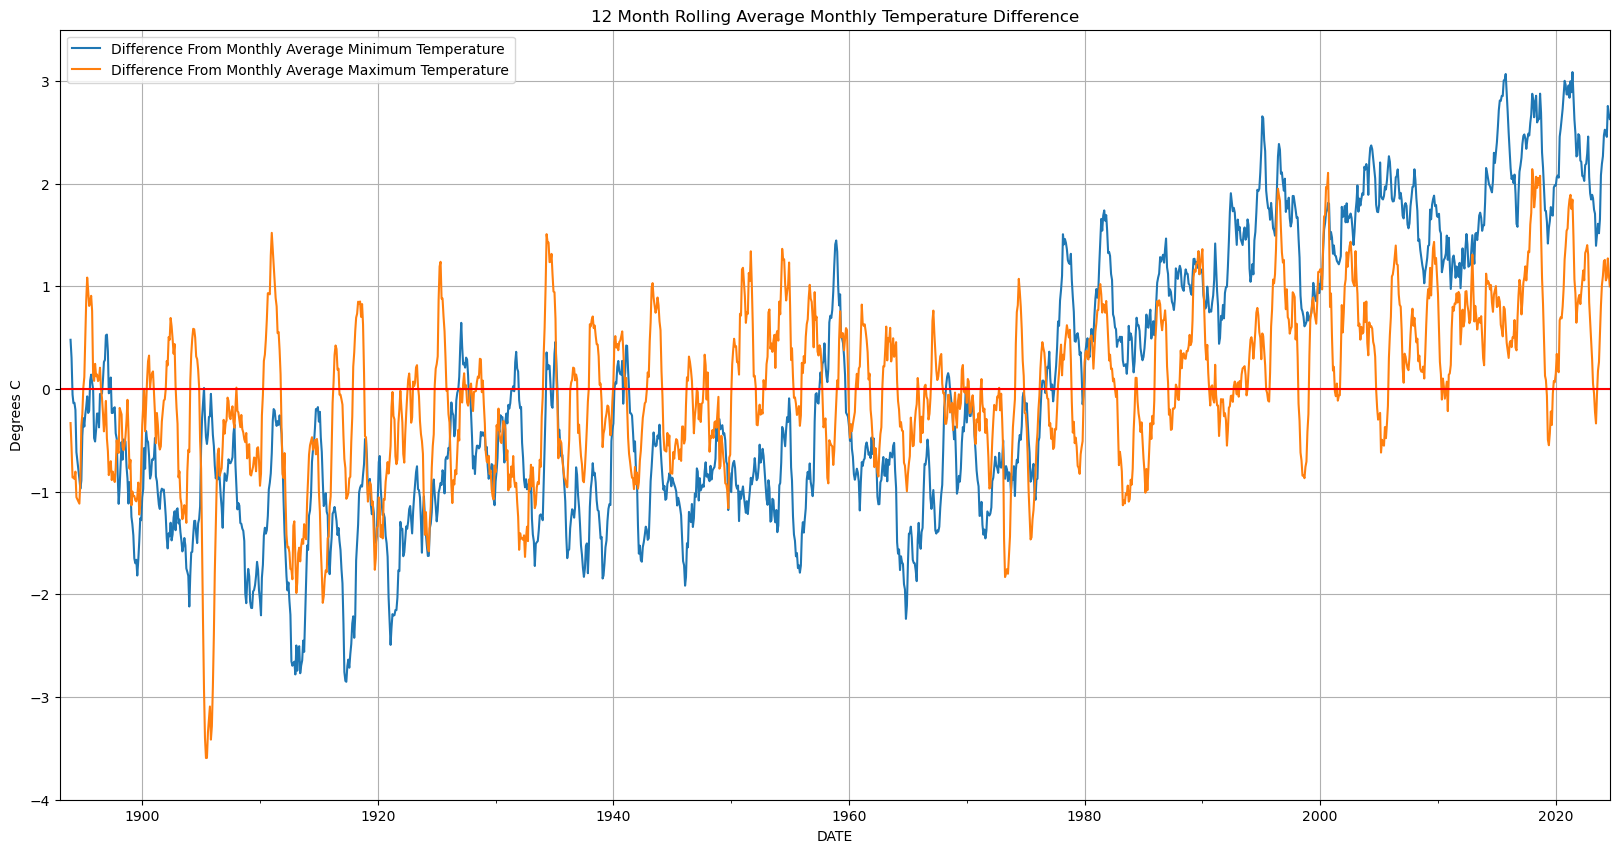

In [215]:
# Set the plot dimension and values to plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(TMIN_avg['YRMN'], TMIN_avg['RAVG'], label='Difference From Monthly Average Minimum Temperature')
ax.plot(TMAX_avg['YRMN'], TMAX_avg['RAVG'], label='Difference From Monthly Average Maximum Temperature')

# Set ticks and labels for the x-axis
years = mdates.YearLocator(10)
years_20 = mdates.YearLocator(20)
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years_20)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Set the y-axis limits
ax.set_ylim(-4, 3.5)
ax.set_xlim(mdates.date2num(datetime.strptime('1893-01', '%Y-%m')), 
            mdates.date2num(datetime.strptime('2024-08', '%Y-%m')))

# Draw a horizontal line at y=0 in red color
ax.axhline(y=0, color='red')

# Other plot settings
plt.xlabel('DATE')
plt.ylabel('Degrees C')
plt.title('12 Month Rolling Average Monthly Temperature Difference')
plt.legend()
plt.grid()
plt.show()